In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("sine_data.txt",delimiter=",",names=["volt","ms"])

In [3]:
cutoff=50
RC=1/(2*3.1416*cutoff);
df["alpha"]=(df["ms"]/1000000)/(RC+(df["ms"]/1000000))
# df["alpha"]=(df["ms"])/(RC+(df["ms"]))
# df["alpha"]=[0.1 for i in df["alpha"]]

In [4]:
values=df[["alpha","volt"]].to_numpy()

In [11]:
volts_=[]
for i in range(len(values)):
    if i==0:
        value=0;#values[i][1]*values[i][0]
        volts_.append(value)
    else:
        value=values[i][1]*values[i][0]+(1-values[i][0])*volts_[i-1]
        volts_.append(value)

In [12]:
df["volts_lowpass"]=volts_

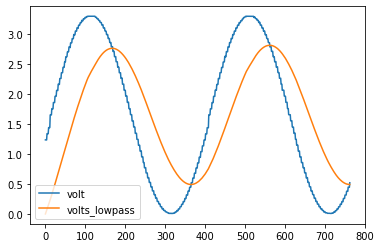

In [13]:
df[["volt","volts_lowpass"]].plot()

In [8]:
df["alpha"].describe

<bound method NDFrame.describe of 0      0.015769
1      0.015769
2      0.014856
3      0.015769
4      0.015465
         ...   
758    0.015465
759    0.015769
760    0.015465
761    0.015465
762    0.015465
Name: alpha, Length: 763, dtype: float64>

In [67]:
np.random.normal(0)/10

0.04232617240261935

5


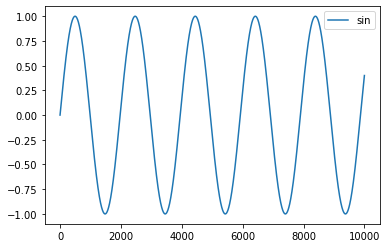

In [191]:
Hz=50
sample_rate=10000
50*2*np.pi
df=pd.DataFrame([np.sin(i/(2*np.pi*(Hz))) for i in range(0,(sample_rate))],columns=["sin"])
df.plot()
counter=0
prev=df["sin"][0]
for i in df["sin"][1:]:
    if prev < -0.01 and i>-0.01:
        counter +=1
    prev=i
print(counter)

In [184]:
1/(1200*50)

1.6666666666666667e-05

In [192]:
counter=0
prev=df["sin"][0]
for i in df["sin"][1:]:
    if prev < -0.01 and i>-0.01:
        counter +=1
    prev=i
print(counter)

5


In [193]:
import pandas as pd
import numpy as np
df_=pd.DataFrame([(np.sin(i/10000)+1)*0.5*1023+np.random.normal(0)/10 for i in range(0,int(np.pi*100000))],columns=["sin"])

In [194]:
cutoff=[50,10,100]
deltaT=1/1000000
RC=[1/(2*3.1416*i) for i in cutoff]
alpha50=deltaT/(RC[0]+deltaT)
alpha10=deltaT/(RC[1]+deltaT)
alpha100=deltaT/(RC[2]+deltaT)
alpha50,alpha10,alpha100

(0.0003140613344911562, 6.282805238781235e-05, 0.0006279254618737954)

In [195]:
Hz50=[]
last_filtered=0
for i in df_["sin"]:
    value=i*alpha50+(1-alpha50)*last_filtered
    Hz50.append(value)
    last_filtered=value

df_["Hz50"]=Hz50

In [196]:
Hz10=[]
last_filtered=0
for i in df_["sin"]:
    value=i*alpha10+(1-alpha10)*last_filtered
    Hz10.append(value)
    last_filtered=value

df_["Hz10"]=Hz10

In [197]:
Hz100=[]
last_filtered=0
for i in df_["sin"]:
    value=i*alpha100+(1-alpha100)*last_filtered
    Hz100.append(value)
    last_filtered=value

df_["Hz100"]=Hz100

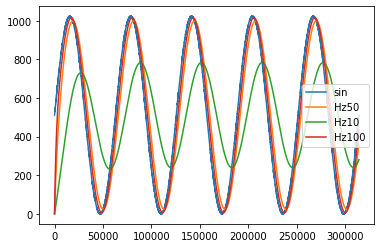

In [198]:
df_.plot()